In [1]:
import os
import sys
import shutil
import math
import warnings
from typing import *
from enum import Enum
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sys.path.append("/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/UpdatedCellDeathQuantification/CellDeathQuantification/QuantificationScripts")
from QuantificationScripts.NucleationAndPropagationMeasurements import *
from OldCodeBase_15072021.NucliatorsCount import NucleatorsCounter 
from OldCodeBase_15072021.NucleationProbabilityAndSPI import NucleationProbabilityAndSPI 
from RegenratingPreviousResultsScripts.PreviousResultsUtils import *

In [4]:
np.load("/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldDataResultsGeneration/20170929_MCF7_H2O2_xy30.csv_factor_of_change_map_5_tods_5.npy")

array([[1.30976724, 1.12226624, 1.28053461, 1.51738018, 0.82560412],
       [1.18746547, 1.10357109, 1.22275675, 1.28730124, 1.11685849],
       [1.18209759, 1.19553481, 1.14119259, 1.19520441, 0.99899623],
       [1.17153227, 1.10290213, 1.14297139, 1.11393105, 0.98135868],
       [1.14161399, 1.08102831, 1.10614871, 1.04277263, 0.99005033]])

Randomizing cells' TODs - permutation #0
Randomizing cells' TODs - permutation #1
Randomizing cells' TODs - permutation #2
Randomizing cells' TODs - permutation #3
Randomizing cells' TODs - permutation #4
Randomizing cells' TODs - permutation #5
Randomizing cells' TODs - permutation #6
Randomizing cells' TODs - permutation #7
Randomizing cells' TODs - permutation #8
Randomizing cells' TODs - permutation #9


<Figure size 640x480 with 0 Axes>

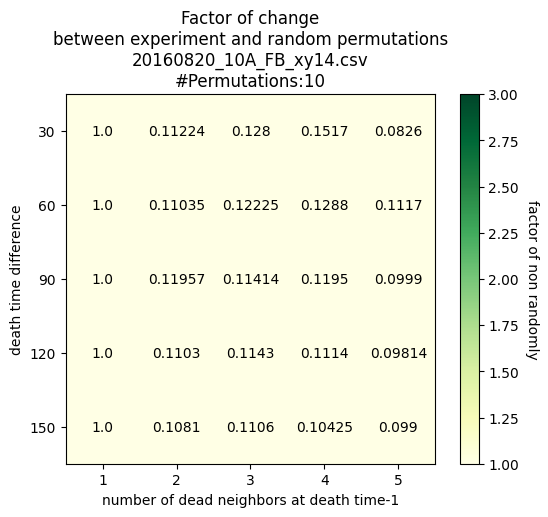

/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/UpdatedCellDeathQuantification/CellDeathQuantification/QuantificationScripts/NucleationAndPropagationMeasurements.py:2391: RuntimeWarning: invalid value encountered in divide
  cells_death_probabilities_by_n_neighbors_and_delta_tods_factor_change = randomaly_permuted_cells_death_probabilities_by_n_neighbors_and_delta_tods / org_cells_death_probabilities_by_n_neighbors_and_delta_tods


In [9]:
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"
meta_data_file_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"

exps_results_dicts = calc_factor_of_propagation_by_number_of_dead_neighbors_and_time_from_recent_neighbors_death(
        exp_name="20160820_10A_FB_xy14.csv",
        exps_dir_path="/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeFramesData",
        max_number_of_dead_neighbors_to_calc=5,
        max_delta_tod_from_recently_dead_neighbor=5,
        meta_data_full_file_path=meta_data_file_path,
        show_fig=True,
        dist_threshold=200,
        number_of_random_permutations=10,
        include_only_treatments=['FAC'],
        fig_v_min=1.,
        fig_v_max=3.
    )

In [29]:
from QuantificationScripts.SPICalculator import *
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeFramesData"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_full_path = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeMinutesData/20160820_10A_FB_xy13.csv"
cells_locis, cells_tods = read_experiment_cell_xy_and_death_times(exp_full_path=exp_full_path)
exp_name = '20160820_10A_FB_xy11.csv'
exp_treatment, exp_temporal_resolution = get_exp_treatment_type_and_temporal_resolution(exp_file_name=exp_name,
                                                                                            meta_data_file_full_path=meta_data_file_full_path)

nuc_p_spi = SPICalculator(XY=cells_locis,
                                        die_times=cells_tods,
                                        temporal_resolution=exp_temporal_resolution,
                                        treatment=exp_treatment,
                                        n_scramble=1000,
                                        draw=False,
                                        dist_threshold_nucliators_detection=200)
print(nuc_p_spi.get_spis())

[0.40834539]


In [48]:
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = list(meta_data_extract_exp_names.iloc[8:12,1])
distribution_of_deltaTODs_value = values_distribution_of_distances_or_delta_TODs_for_each_nighbors_pairs(returned_value ="TODs",
                                                                                           exp_name=exp_names,
                                                                       exps_dir_path= exps_dir_name,
                                                                       meta_data_full_file_path= meta_data_file_full_path
                                                                       )
distribution_of_distances_value = values_distribution_of_distances_or_delta_TODs_for_each_nighbors_pairs(returned_value ="distances",
                                                                                           exp_name=exp_names,
                                                                       exps_dir_path= exps_dir_name,
                                                                       meta_data_full_file_path= meta_data_file_full_path
                                                                       )
all_exp_results_local_density_values = calc_exp_all_cells_local_densities_for_distribution(exp_name = exp_names,
                                                                                           exps_dir_path=exps_dir_name,
                                                                                           meta_data_full_file_path=meta_data_file_full_path,
                                                                                           radious_for_density = 100)

In [49]:
melted_distances_distribution_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names, 
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=distribution_of_distances_value,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="distances_values",
                                                                                                        Density_needed=True))

melted_delta_tods_distribution_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names, 
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=distribution_of_deltaTODs_value,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="delta_tods_value",
                                                                                                        Density_needed=True))

melted_local_densities_distribution_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names,
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=all_exp_results_local_density_values,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="Local_density",
                                                                                                        Density_needed=True))
df_1 = melted_distances_distribution_df.melt(id_vars=["Experiment_name","Density","Treatment"])
df_2 = melted_delta_tods_distribution_df.melt(id_vars=["Experiment_name","Density","Treatment"])
df_3 = melted_local_densities_distribution_df.melt(id_vars=["Experiment_name","Density","Treatment"])

visualize_delta_tods_distances_local_densities_distribution_melted = pd.concat([df_1,df_2,df_3])

2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_

In [50]:

def replacing_name(long_ugly_name=""):
    if "sparse1" in long_ugly_name.lower():
        return "sparse1"
    elif "sparse2" in long_ugly_name.lower():
        return "sparse2"
    elif "interval_dense_" in long_ugly_name.lower():
        return "dense1"
    else:
        return "dense2"
visualize_delta_tods_distances_local_densities_distribution_melted["treatment_density"] = [replacing_name(item) for item in visualize_delta_tods_distances_local_densities_distribution_melted["Experiment_name"]]

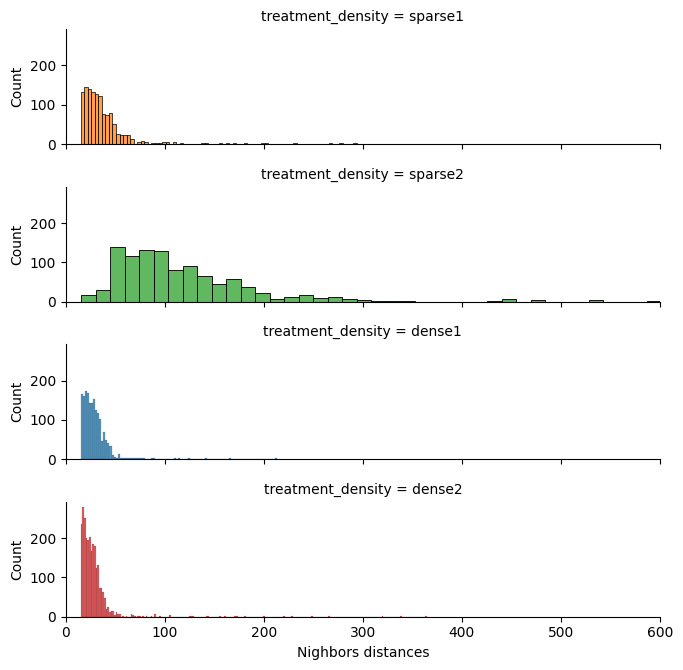

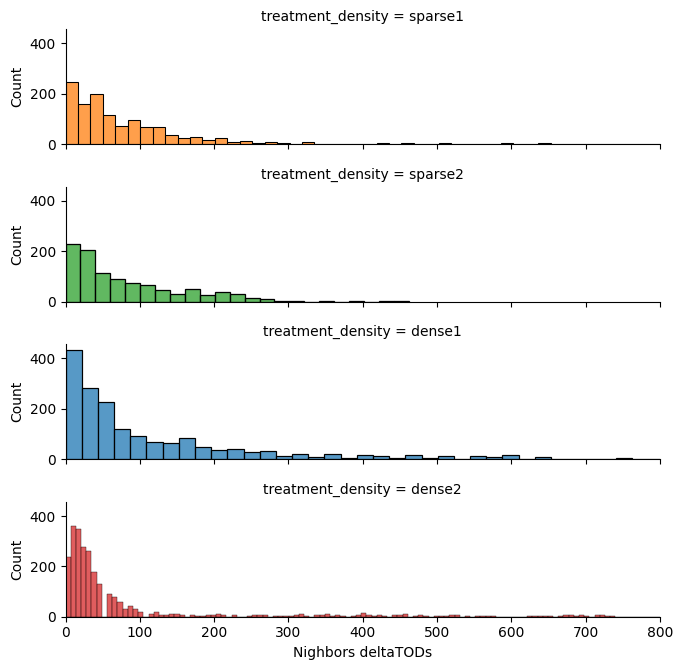

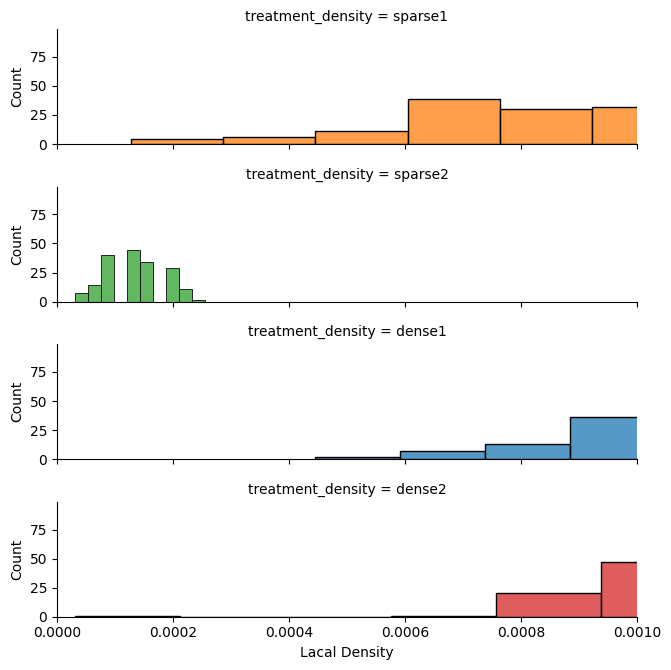

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="distances_values"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"], hue="treatment_density")
g.map(sns.histplot, "value")
plt.xlabel('Nighbors distances')
g.set(xlim=(0,600))



g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="delta_tods_value"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"],hue="treatment_density")
g.map(sns.histplot, "value")
plt.xlabel('Nighbors deltaTODs')
g.set(xlim=(0,800))

g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="Local_density"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"],hue="treatment_density")
g.map(sns.histplot, "value")
plt.xscale("linear")
plt.xlabel('Lacal Density')
g.set(xlim=(0,0.001))

plt.show()

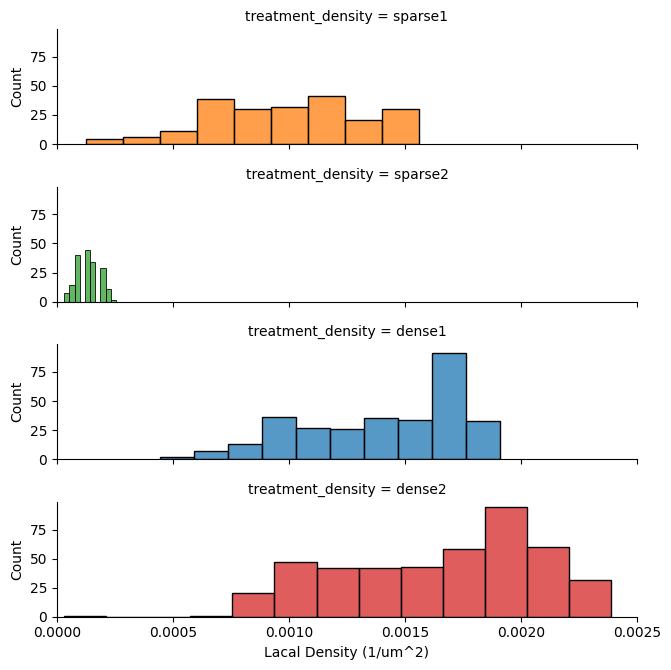

In [52]:
g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="Local_density"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"],hue="treatment_density")
g.map(sns.histplot, "value")
# plt.xscale("log")
plt.xlabel('Lacal Density (1/um^2)')
g.set(xlim=(0,0.0025))

plt.show()

# Previuos Data Local Density

In [4]:
#OLD DATA
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeFramesData"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = meta_data_extract_exp_names.iloc[:95,1]

all_prevoius_exp_results_local_density_values = calc_exp_all_cells_local_densities_for_distribution(exp_name = list(exp_names),
                                                                                           exps_dir_path=exps_dir_name,
                                                                                           meta_data_full_file_path=meta_data_file_full_path,
                                                                                           radious_for_density = 100)
melted_local_densities_distribution_previous_exp_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names,
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=all_prevoius_exp_results_local_density_values,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="Local_density",
                                                                                                        Density_needed=False))
previous_exp_local_density = melted_local_densities_distribution_previous_exp_df.melt(id_vars=["Experiment_name","Treatment"])
previous_exp_local_density["Sh_Treatment"] = [replace_ugly_long_name(item) for item in previous_exp_local_density["Experiment_name"]]

In [5]:
def replacing_name_1(long_ugly_name=""):
    if "sparse1" in long_ugly_name.lower():
        return "sparse- FAC&BSO"
    elif "sparse2" in long_ugly_name.lower():
        return "sparse- FAC&BSO"
    elif "interval_dense_" in long_ugly_name.lower():
        return "dense- FAC&BSO"
    else:
        return "dense- FAC&BSO"

In [6]:
# NEW DATA
exps_dir_name_new = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path_new= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"
meta_data_extract_exp_names_new= pd.read_csv(meta_data_file_full_path_new)
exp_names_new = meta_data_extract_exp_names_new.iloc[8:12,1]

all_new_exp_results_local_density_values = calc_exp_all_cells_local_densities_for_distribution(exp_name = list(exp_names_new),
                                                                                           exps_dir_path=exps_dir_name_new,
                                                                                           meta_data_full_file_path=meta_data_file_full_path_new,
                                                                                           radious_for_density = 100)

melted_local_densities_distribution_new_exp_df= pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names_new,
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=all_new_exp_results_local_density_values,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path_new,
                                                                                                        name_of_the_melted_variable="Local_density",
                                                                                                        Density_needed=True))

new_exp_local_density = melted_local_densities_distribution_new_exp_df.melt(id_vars=["Experiment_name","Treatment","Density"])

new_exp_local_density["Sh_Treatment"] = [replacing_name_1(item) for item in new_exp_local_density["Experiment_name"]]
all_exp_new_and_previous_local_density = pd.concat([new_exp_local_density,previous_exp_local_density])

2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv


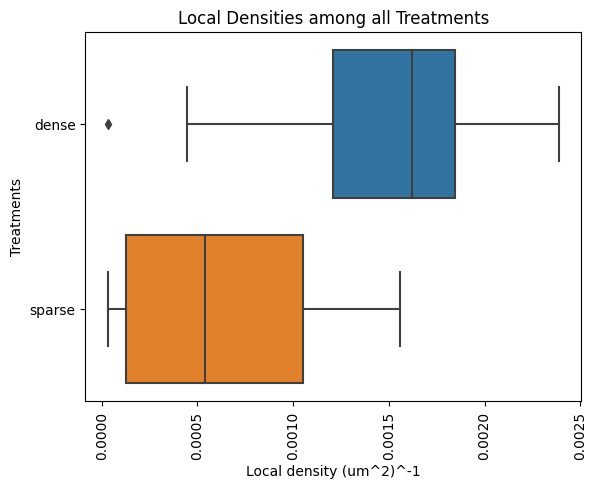

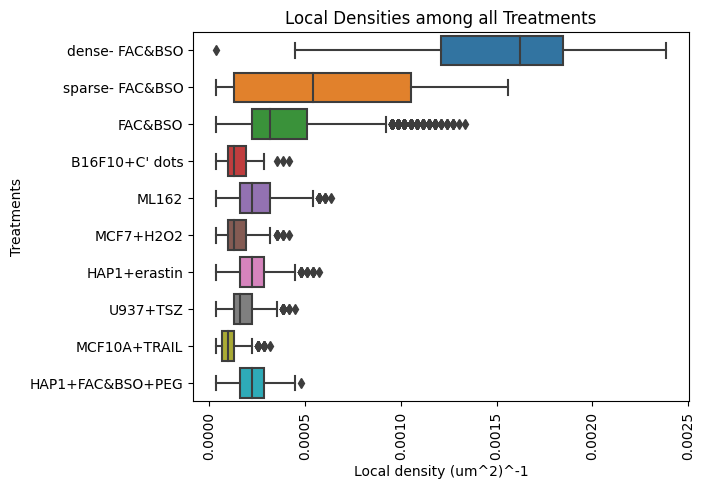

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
Figure=sns.boxplot(y='Density', x='value', data= new_exp_local_density, orient="h")
plt.title("Local Densities among all Treatments")
plt.xlabel("Local density (um^2)^-1")
plt.ylabel("Treatments")
Figure.tick_params(axis='x', rotation=90)
# Figure.set(xscale="log")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
Figure=sns.boxplot(y='Sh_Treatment', x='value', data= all_exp_new_and_previous_local_density, orient="h")
plt.title("Local Densities among all Treatments")
plt.xlabel("Local density (um^2)^-1")
plt.ylabel("Treatments")
Figure.tick_params(axis='x', rotation=90)
# Figure.set(xscale="log")
plt.show()



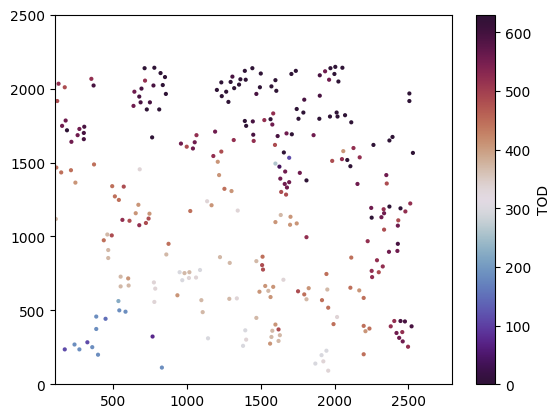

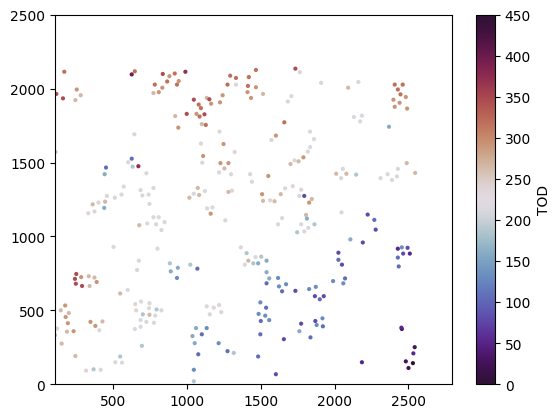

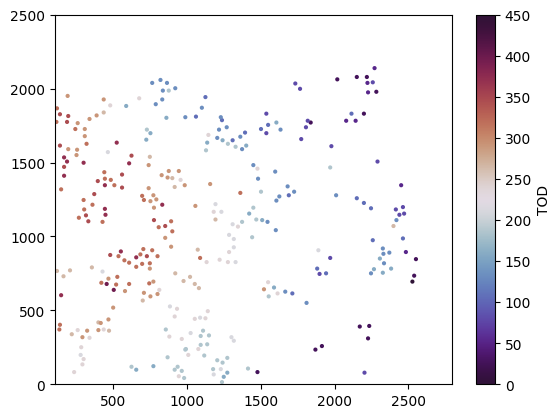

In [2]:
#OLD DATA
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeMinutesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = list(meta_data_extract_exp_names.iloc[:95,1])

draw_cells_via_fixed_radious_according_to_xy_cordination_of_prevoius_data(exp_name = exp_names,
                                                                                           exps_dir_path=exps_dir_name,
                                                                                           meta_data_full_file_path=meta_data_file_full_path,
                                                                                           cells_fixed_radious = 3,
                                                                                           treatment_to_include = ["c' dots"])